### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12740\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
data.corr().Profit.sort_values(ascending=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12740\464908146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().Profit.sort_values(ascending=False)


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

### Checking Null values

In [8]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.State.nunique()

3

In [11]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Data Visualization

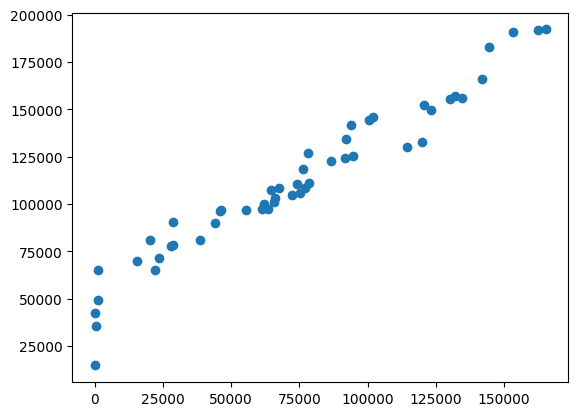

In [13]:
plt.scatter(data['R&D Spend'],data['Profit'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12740\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

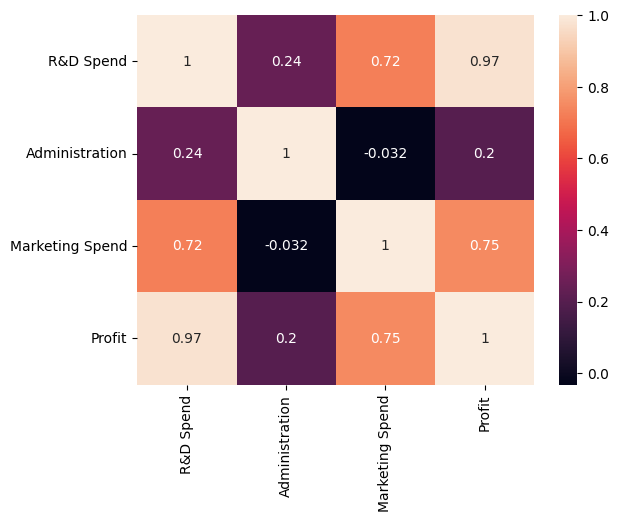

In [14]:
sns.heatmap(data.corr(),annot=True)

### Outlier detection

<Axes: ylabel='Administration'>

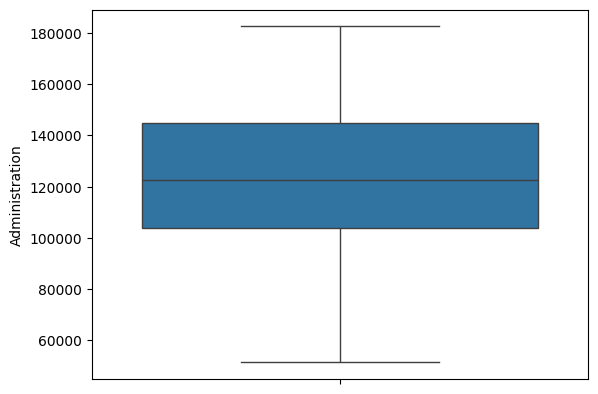

In [15]:
sns.boxplot(data['Administration'])

<Axes: ylabel='R&D Spend'>

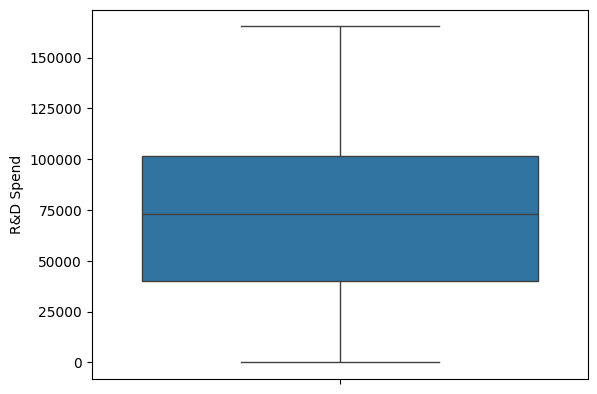

In [16]:
sns.boxplot(data['R&D Spend'])

<Axes: ylabel='Marketing Spend'>

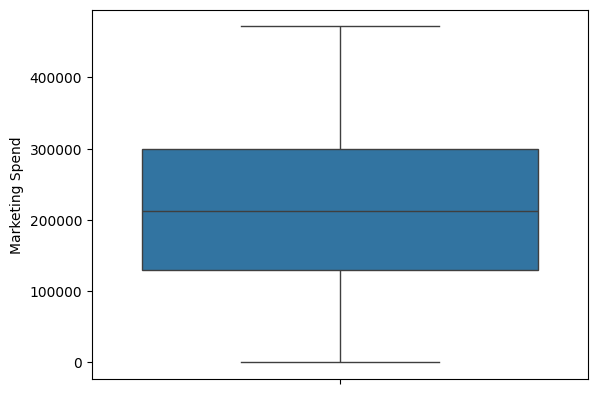

In [17]:
sns.boxplot(data['Marketing Spend'])


### Splitting Dependent and Independent variables

In [18]:
x=data.drop(columns=['Profit'],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [19]:
y=data['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()


In [21]:
x['State']=ls.fit_transform(x['State'])

In [22]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [23]:
print(ls.classes_)

['California' 'Florida' 'New York']


In [24]:
mapping=dict(zip(ls.classes_,range(len(ls.classes_))))
mapping

{'California': 0, 'Florida': 1, 'New York': 2}

### Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [26]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_scaled

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
5,0.797566,0.369448,0.769126,1.0
6,0.814128,0.730161,0.270710,0.0
7,0.788018,0.717457,0.686493,0.5
8,0.729018,0.741733,0.660500,1.0
9,0.745906,0.436929,0.646443,0.0


### Train test split

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

### Model building

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [29]:
ypred=regr.predict(xtest)

In [30]:
ytest

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [31]:
profit=pd.DataFrame({"Actual_profit":ytest,"Predicted _profit":ypred})
profit

,Actual_profit,Predicted _profit
28,103282.38,103959.405080
11,144259.40,132398.732367
10,146121.95,133529.037901
41,77798.83,72958.283683
2,191050.39,179534.787372
27,105008.31,115533.625841
38,81229.06,67476.958479
31,97483.56,98504.361994
22,110352.25,114789.160838
4,166187.94,168972.219099


### Random Value Prediction

In [32]:
regr.predict([[165349.20,136897.80,471784.10,2]])

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.95662484e+10])

In [33]:
 regr.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([192416.48617631])

### Evaluation of Model

In [34]:
from sklearn import metrics
print(metrics.r2_score(ytest,ypred))
print(metrics.mean_squared_error(ytest,ypred))
print(np.sqrt(metrics.mean_squared_error(ytest,ypred)))


0.9386861070938134
78413822.17201328
8855.157941675196


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              499.4
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    5.45e-31
Time:                        13:56:58   Log-Likelihood:                         -442.77
No. Observations:                  40   AIC:                                      893.5
Df Residuals:                      36   BIC:                                      900.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend         1.12e+05   1.46e+04      7.690      0.000    8.24e+04    1.42e+05
Administration   5.942e+04   8987.647      6.611      0.000    4.12e+04    7.76e+04
Marketing Spend  4.683e+04   1.35e+04      3.475      0.001    1.95e+04    7.42e+04
State            9755.3274   5814.898      1.678      0.102   -2037.832    2.15e+04
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.421
Skew:                          -0.177   Prob(JB):                        0.810
Kurtosis:                       2.643   Cond. No.                         7.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pickle
pickle.dump(regr,open('model.pkl','wb'))
pickle.dump(ms,open('scaler.pkl','wb'))